In [17]:
from experiment import Experiment
import torch
%matplotlib inline

In [18]:
var_dict = dict(
    numerical_vars = ['Number_of_times_pregnant','Plasma_glucose','Diastolic_blood_pressure',
                      'Triceps_skin_fold_thickness','serum_insulin','Body_mass_index',
                      'Diabetes_pedigree_function','Age'],
    class_var = 'class'
)

In [19]:
exp = Experiment('data/pima.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=1e-3,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [20]:
exp.data.shape

(768, 9)

In [21]:
%time clustering_scores = exp.test_clustering_performance()

#Init Bin = 10
Learned #Bin by Variables = [2, 3, 2, 4, 5, 4, 5, 3]
#Init Bin = 15
Learned #Bin by Variables = [8, 9, 12, 5, 7, 6, 7, 10]
#Init Bin = 20
Learned #Bin by Variables = [8, 12, 12, 5, 5, 7, 15, 10]
CPU times: user 1min 17s, sys: 36.4 s, total: 1min 54s
Wall time: 1min 16s


In [22]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 8, NMI = 0.0297
agglomerative, #Cols = 8, NMI = 0.0459


In [23]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 8, NMI = 0.0622
agglomerative, #Cols = 8, NMI = 0.0708


In [24]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 16, #NMI = 0.0371
#Bins = 3, #Cols = 24, #NMI = 0.1267
#Bins = 4, #Cols = 32, #NMI = 0.0116
#Bins = 5, #Cols = 40, #NMI = 0.0554
#Bins = 6, #Cols = 48, #NMI = 0.0314
#Bins = 7, #Cols = 56, #NMI = 0.1071
#Bins = 8, #Cols = 64, #NMI = 0.0788
#Bins = 9, #Cols = 72, #NMI = 0.0826
#Bins = 10, #Cols = 80, #NMI = 0.0122
#Bins = 11, #Cols = 88, #NMI = 0.0084
#Bins = 12, #Cols = 96, #NMI = 0.0042
#Bins = 13, #Cols = 104, #NMI = 0.0026
#Bins = 14, #Cols = 112, #NMI = 0.0018
#Bins = 15, #Cols = 120, #NMI = 0.0013
#Bins = 16, #Cols = 128, #NMI = 0.0002
#Bins = 17, #Cols = 136, #NMI = 0.0000
#Bins = 18, #Cols = 144, #NMI = 0.0000
#Bins = 19, #Cols = 152, #NMI = 0.0001
#Bins = 20, #Cols = 160, #NMI = 0.0003
agglomerative
#Bins = 2, #Cols = 16, #NMI = 0.0719
#Bins = 3, #Cols = 24, #NMI = 0.0680
#Bins = 4, #Cols = 32, #NMI = 0.0212
#Bins = 5, #Cols = 40, #NMI = 0.0702
#Bins = 6, #Cols = 48, #NMI = 0.0427
#Bins = 7, #Cols = 56, #NMI = 0.1157
#Bins = 8, #Cols = 64, #NMI = 0.001

In [25]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 16, #NMI = 0.0751
#Bins = 3, #Cols = 23, #NMI = 0.0188
#Bins = 4, #Cols = 30, #NMI = 0.0172
#Bins = 5, #Cols = 37, #NMI = 0.0059
#Bins = 6, #Cols = 45, #NMI = 0.0009
#Bins = 7, #Cols = 50, #NMI = 0.0025
#Bins = 8, #Cols = 58, #NMI = 0.0008
#Bins = 9, #Cols = 64, #NMI = 0.0013
#Bins = 10, #Cols = 72, #NMI = 0.0007
#Bins = 11, #Cols = 78, #NMI = 0.0007
#Bins = 12, #Cols = 84, #NMI = 0.0008
#Bins = 13, #Cols = 90, #NMI = 0.0002
#Bins = 14, #Cols = 96, #NMI = 0.0008
#Bins = 15, #Cols = 103, #NMI = 0.0000
#Bins = 16, #Cols = 110, #NMI = 0.0007
#Bins = 17, #Cols = 115, #NMI = 0.0000
#Bins = 18, #Cols = 120, #NMI = 0.0006
#Bins = 19, #Cols = 127, #NMI = 0.0000
#Bins = 20, #Cols = 134, #NMI = 0.0009
agglomerative
#Bins = 2, #Cols = 16, #NMI = 0.0523
#Bins = 3, #Cols = 23, #NMI = 0.0127
#Bins = 4, #Cols = 30, #NMI = 0.1207
#Bins = 5, #Cols = 37, #NMI = 0.0285
#Bins = 6, #Cols = 45, #NMI = 0.0108
#Bins = 7, #Cols = 50, #NMI = 0.0068
#Bins = 8, #Cols = 58, #NMI = 0.0117


In [26]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 28, NMI = 0.0292
#Init Bins = 15, #Cols = 64, NMI = 0.0014
#Init Bins = 20, #Cols = 74, NMI = 0.0009
agglomerative
#Init Bins = 10, #Cols = 28, NMI = 0.0540
#Init Bins = 15, #Cols = 64, NMI = 0.0006
#Init Bins = 20, #Cols = 74, NMI = 0.0028


In [27]:
%time clf_scores = exp.test_classification_performance(cv=3)

#Init Bin = 10
Learned #Bin by Variables = [5, 3, 4, 4, 5, 7, 4, 3]
#Init Bin = 15
Learned #Bin by Variables = [7, 7, 12, 5, 6, 6, 7, 10]
#Init Bin = 20
Learned #Bin by Variables = [5, 14, 8, 13, 9, 15, 11, 8]
#Init Bin = 10
Learned #Bin by Variables = [6, 2, 2, 2, 5, 5, 4, 3]
#Init Bin = 15
Learned #Bin by Variables = [7, 11, 12, 7, 6, 4, 7, 12]
#Init Bin = 20
Learned #Bin by Variables = [8, 13, 12, 5, 6, 7, 18, 10]
#Init Bin = 10
Learned #Bin by Variables = [3, 4, 4, 2, 4, 4, 8, 9]
#Init Bin = 15
Learned #Bin by Variables = [5, 11, 3, 8, 3, 8, 9, 10]
#Init Bin = 20
Learned #Bin by Variables = [7, 13, 11, 13, 10, 8, 20, 14]
CPU times: user 3min 12s, sys: 1min, total: 4min 13s
Wall time: 3min 10s


In [28]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 8.0, Accuracy = 0.721 (+/- 0.058)
LR performance
#cols = 8.0, Accuracy = 0.759 (+/- 0.018)


In [29]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 8.0, Accuracy = 0.723 (+/- 0.056)
LR performance
#cols = 8.0, Accuracy = 0.759 (+/- 0.054)


In [30]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 16.0, Accuracy = 0.673 (+/- 0.030)
#Bins = 3, #Avg Cols = 24.0, Accuracy = 0.712 (+/- 0.010)
#Bins = 4, #Avg Cols = 32.0, Accuracy = 0.734 (+/- 0.051)
#Bins = 5, #Avg Cols = 40.0, Accuracy = 0.701 (+/- 0.032)
#Bins = 6, #Avg Cols = 48.0, Accuracy = 0.708 (+/- 0.042)
#Bins = 7, #Avg Cols = 56.0, Accuracy = 0.720 (+/- 0.027)
#Bins = 8, #Avg Cols = 64.0, Accuracy = 0.716 (+/- 0.092)
#Bins = 9, #Avg Cols = 72.0, Accuracy = 0.721 (+/- 0.022)
#Bins = 10, #Avg Cols = 80.0, Accuracy = 0.717 (+/- 0.018)
#Bins = 11, #Avg Cols = 88.0, Accuracy = 0.677 (+/- 0.007)
#Bins = 12, #Avg Cols = 96.0, Accuracy = 0.727 (+/- 0.017)
#Bins = 13, #Avg Cols = 104.0, Accuracy = 0.685 (+/- 0.051)
#Bins = 14, #Avg Cols = 112.0, Accuracy = 0.716 (+/- 0.032)
#Bins = 15, #Avg Cols = 120.0, Accuracy = 0.703 (+/- 0.019)
#Bins = 16, #Avg Cols = 128.0, Accuracy = 0.698 (+/- 0.018)
#Bins = 17, #Avg Cols = 136.0, Accuracy = 0.685 (+/- 0.054)
#Bins = 18, #Avg Cols = 144.0, Accuracy = 0.

In [31]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 16.0, Accuracy = 0.714 (+/- 0.019)
#Bins = 3, #Avg Cols = 23.0, Accuracy = 0.714 (+/- 0.045)
#Bins = 4, #Avg Cols = 30.0, Accuracy = 0.727 (+/- 0.017)
#Bins = 5, #Avg Cols = 37.0, Accuracy = 0.724 (+/- 0.016)
#Bins = 6, #Avg Cols = 45.0, Accuracy = 0.723 (+/- 0.029)
#Bins = 7, #Avg Cols = 50.333333333333336, Accuracy = 0.716 (+/- 0.022)
#Bins = 8, #Avg Cols = 58.0, Accuracy = 0.690 (+/- 0.013)
#Bins = 9, #Avg Cols = 64.0, Accuracy = 0.707 (+/- 0.028)
#Bins = 10, #Avg Cols = 71.66666666666667, Accuracy = 0.725 (+/- 0.004)
#Bins = 11, #Avg Cols = 77.33333333333333, Accuracy = 0.677 (+/- 0.035)
#Bins = 12, #Avg Cols = 84.33333333333333, Accuracy = 0.728 (+/- 0.019)
#Bins = 13, #Avg Cols = 90.33333333333333, Accuracy = 0.702 (+/- 0.058)
#Bins = 14, #Avg Cols = 96.66666666666667, Accuracy = 0.704 (+/- 0.037)
#Bins = 15, #Avg Cols = 102.66666666666667, Accuracy = 0.691 (+/- 0.022)
#Bins = 16, #Avg Cols = 110.0, Accuracy = 0.698 (+/- 0.036)
#Bins = 17, #A

In [32]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 34.0, Accuracy = 0.715 (+/- 0.022)
#Init Bins = 15, #Avg Cols = 61.0, Accuracy = 0.732 (+/- 0.019)
#Init Bins = 20, #Avg Cols = 86.0, Accuracy = 0.715 (+/- 0.055)
LR performance
#Init Bins = 10, #Avg Cols = 34.0, Accuracy = 0.730 (+/- 0.006)
#Init Bins = 15, #Avg Cols = 61.0, Accuracy = 0.755 (+/- 0.042)
#Init Bins = 20, #Avg Cols = 86.0, Accuracy = 0.757 (+/- 0.042)
NB performance
#Init Bins = 10, #Avg Cols = 34.0, Accuracy = 0.730 (+/- 0.068)
#Init Bins = 15, #Avg Cols = 61.0, Accuracy = 0.741 (+/- 0.058)
#Init Bins = 20, #Avg Cols = 86.0, Accuracy = 0.745 (+/- 0.055)


In [4]:
exp.data.shape

(768, 9)

In [26]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=30, lr=5e-3, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=20)

>>> Epoch = 1, Loss = 0.3354729413986206
[8, 12, 12, 8, 7, 9, 11, 7]
>>> Epoch = 2, Loss = 0.21015498042106628
[7, 19, 12, 7, 5, 9, 17, 16]
>>> Epoch = 3, Loss = 0.19628816843032837
[7, 17, 12, 14, 5, 9, 16, 16]
>>> Epoch = 4, Loss = 0.1930144876241684
[5, 13, 12, 14, 5, 19, 17, 13]
>>> Epoch = 5, Loss = 0.19332416355609894
[5, 13, 12, 14, 5, 19, 17, 16]
>>> Epoch = 6, Loss = 0.1949499100446701
[5, 13, 12, 14, 6, 19, 17, 16]
>>> Epoch = 7, Loss = 0.1938069462776184
[5, 13, 12, 14, 5, 9, 17, 16]
>>> Epoch = 8, Loss = 0.19561031460762024
[5, 13, 12, 14, 5, 9, 17, 16]
>>> Epoch = 9, Loss = 0.19582611322402954
[8, 13, 12, 5, 8, 9, 17, 16]
>>> Epoch = 10, Loss = 0.19596071541309357
[8, 13, 12, 5, 4, 9, 17, 16]
>>> Epoch = 11, Loss = 0.19368083775043488
[8, 13, 12, 5, 8, 9, 16, 16]
>>> Epoch = 12, Loss = 0.19414876401424408
[8, 13, 12, 5, 5, 9, 16, 10]
>>> Epoch = 13, Loss = 0.19375306367874146
[8, 12, 12, 5, 8, 9, 16, 16]
>>> Epoch = 14, Loss = 0.19186575710773468
[8, 18, 12, 5, 8, 9, 16, 1

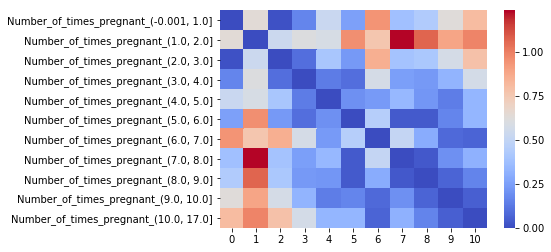

In [27]:
sb.plot_pairwise_distance_between_bins('Number_of_times_pregnant')

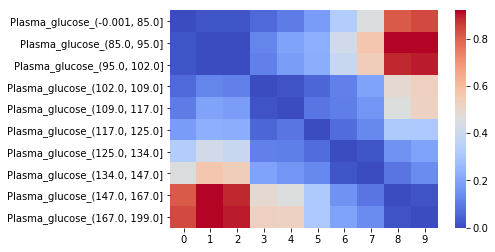

In [17]:
sb.plot_pairwise_distance_between_bins('Plasma_glucose')

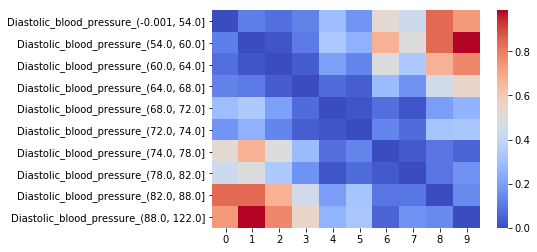

In [18]:
sb.plot_pairwise_distance_between_bins('Diastolic_blood_pressure')

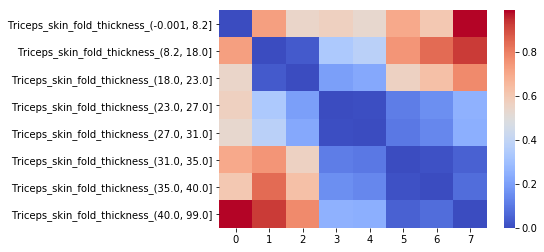

In [19]:
sb.plot_pairwise_distance_between_bins('Triceps_skin_fold_thickness')

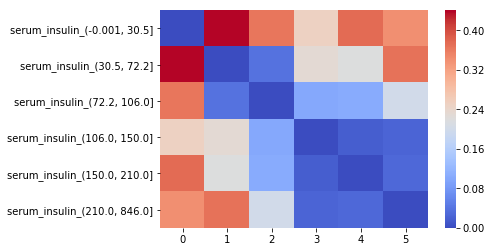

In [20]:
sb.plot_pairwise_distance_between_bins('serum_insulin')

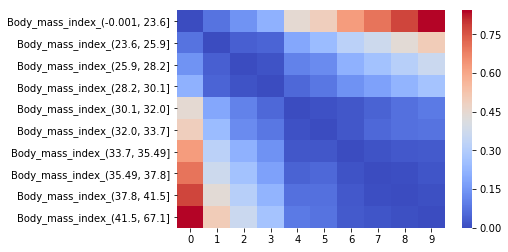

In [21]:
sb.plot_pairwise_distance_between_bins('Body_mass_index')

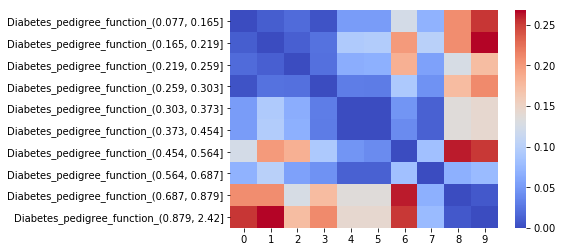

In [22]:
sb.plot_pairwise_distance_between_bins('Diabetes_pedigree_function')

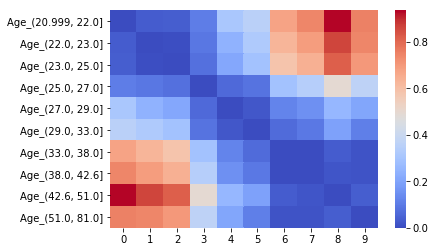

In [23]:
sb.plot_pairwise_distance_between_bins('Age')

In [24]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Number_of_times_pregnant
['(-0.001, 4.0]', '(4.0, 17.0]']
Plasma_glucose
['(-0.001, 102.0]', '(102.0, 125.0]', '(125.0, 147.0]', '(147.0, 199.0]']
Diastolic_blood_pressure
['(-0.001, 68.0]', '(68.0, 122.0]']
Triceps_skin_fold_thickness
['(-0.001, 8.2]', '(8.2, 23.0]', '(23.0, 31.0]', '(31.0, 99.0]']
serum_insulin
['(-0.001, 30.5]', '(30.5, 106.0]', '(106.0, 846.0]']
Body_mass_index
['(-0.001, 30.1]', '(30.1, 67.1]']
Diabetes_pedigree_function
['(0.077, 0.687]', '(0.687, 2.42]']
Age
['(20.999, 25.0]', '(25.0, 33.0]', '(33.0, 81.0]']
